# 동적 프로그래밍과 정책 평가

## 반복적 정책 평가 첫번째 구현

In [6]:
V = {'L1':0.0, 'L2':0.0}

new_V = V.copy()

for _ in range(1000):
    new_V['L1'] = 0.5*(-1 + 0.9*V['L1']) + 0.5*(1 + 0.9*V['L2'])
    new_V['L2'] = 0.5*(0 + 0.9*V['L1']) + 0.5*(-1 + 0.9*V['L2'])
    V = new_V.copy()
print(V)

{'L1': -2.2499999999999982, 'L2': -2.7499999999999982}


In [5]:
V = {'L1':0.0, 'L2':0.0}

new_V = V.copy()
cnt = 0
while True:
    new_V['L1'] = 0.5*(-1 + 0.9*V['L1']) + 0.5*(1 + 0.9*V['L2'])
    new_V['L2'] = 0.5*(0 + 0.9*V['L1']) + 0.5*(-1 + 0.9*V['L2'])
    delta = abs(new_V['L1'] - V['L1'])
    delta = max(delta, abs(new_V['L2'] - V['L2']))
    V = new_V.copy()
    cnt += 1
    if delta < 0.00001:
        print(V)
        print(f'갱신 횟수 {cnt}')
        break

{'L1': -2.249918020373805, 'L2': -2.749918020373805}
갱신 횟수 98


## 반복적 정책 평가_다른 구현 방법

In [7]:
V = {'L1':0.0, 'L2':0.0}
cnt = 0
while True:
    t = 0.5*(-1 + 0.9*V['L1']) + 0.5*(1 + 0.9*V['L2'])
    delta = abs(t - V['L1'])
    V['L1'] = t

    t = 0.5*(0 + 0.9*V['L1']) + 0.5*(-1 + 0.9*V['L2'])
    delta = max(delta, abs(t - V['L2']))
    V['L2'] = t

    cnt += 1
    if delta < 0.00001:
        print(V)
        print(f'갱신 횟수 {cnt}')
        break

{'L1': -2.2499334534874036, 'L2': -2.749937942143848}
갱신 횟수 76


# 더 큰 문제를 향해

## GridWorld 클래스 구현

In [31]:
import numpy as np

class GridWorld:
    def __init__(self):
        self.action_space = [0, 1, 2, 3]
        self.action_meaning = {
            0:'UP',
            1:'DOWN',
            2:'LEFT',
            3:'RIGHT'
        }
        self.reward_map = np.array(
            [[0, 0, 0, 1.0],
            [0, None, 0, -1.0],
            [0, 0, 0, 0]]
        )
        self.goal_state = (0, 3)
        self.wall_state = (1, 1)
        self.start_state = (2, 0)
        self.agent_state = self.start_state

    @property
    def height(self):
        return len(self.reward_map)

    @property
    def width(self):
        return len(self.reward_map[0])

    @property
    def shape(self):
        return self.reward_map.shape

    def action(self):
        return self.action_space

    def states(self):
        for h in range(self.height):
            for w in range(self.width):
                yield (h, w)

### `@property`의 역할

1. **읽기 전용 속성:** `@property`를 사용하면 속성 값을 읽기만 할 수 있게 만들 수 있습니다. 예를 들어, `height`, `width`, `shape`는 `reward_map`의 크기를 반환하는 읽기 전용 속성입니다.
   
2. **계산된 속성:** `@property`를 사용하면 클래스 속성을 정의할 때 추가적인 계산이나 로직을 포함할 수 있습니다. 예를 들어, `height`와 `width`는 `reward_map`의 크기를 동적으로 계산하여 반환합니다.

3. **캡슐화:** 내부 구현을 숨기고 외부에 단순한 인터페이스를 제공할 수 있습니다. 내부적으로 복잡한 로직이 있어도 외부에서는 단순히 속성처럼 접근할 수 있습니다.

### 설명

- `@property` 데코레이터를 사용하여 `height`, `width`, `shape`를 속성처럼 접근할 수 있게 만들었습니다.
- 이제 `grid_world.height`, `grid_world.width`, `grid_world.shape`처럼 속성처럼 접근할 수 있으며, 이는 내부적으로 해당 메서드를 호출하여 값을 반환합니다.
- 이렇게 하면 클래스 내부의 구현을 숨기고 외부에서는 단순하게 속성 접근 방식을 사용할 수 있어 코드가 더 깔끔하고 직관적으로 보입니다.

In [32]:
env = GridWorld()
print("Height:", env.height)
print("Width:", env.width)
print("Shape:", env.shape)

Height: 3
Width: 4
Shape: (3, 4)


In [33]:
env.action()

[0, 1, 2, 3]

In [34]:
for state in env.states():
    print(state)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)


In [35]:
import numpy as np

class GridWorld:
    def __init__(self):
        self.action_space = [0, 1, 2, 3]
        self.action_meaning = {
            0:'UP',
            1:'DOWN',
            2:'LEFT',
            3:'RIGHT'
        }
        self.reward_map = np.array(
            [[0, 0, 0, 1.0],
            [0, None, 0, -1.0],
            [0, 0, 0, 0]]
        )
        self.goal_state = (0, 3)
        self.wall_state = (1, 1)
        self.start_state = (2, 0)
        self.agent_state = self.start_state

    @property
    def height(self):
        return len(self.reward_map)

    @property
    def width(self):
        return len(self.reward_map[0])

    @property
    def shape(self):
        return self.reward_map.shape

    def action(self):
        return self.action_space

    def states(self):
        for h in range(self.height):
            for w in range(self.width):
                yield (h, w)

    def next_state(self, state, action):
        action_move_map = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        move = action_move_map[action]
        next_state = (state[0] + move[0], state[1] + move[1])
        ny, nx = next_state

        if nx<0 or nx>=self.width or ny<0 or ny>self.height:
            next_state = state
        elif next_state == self.wall_state:
            next_state = state

        return next_state

    def reward(self, state, action, next_state):
        return self.reward_map[next_state]


    def render_v(self, v=None, policy=None, print_value=True):
        renderer = render_helper.Renderer(self.reward_map, self.goal_state,
                                          self.wall_state)
        renderer.render_v(v, policy, print_value)

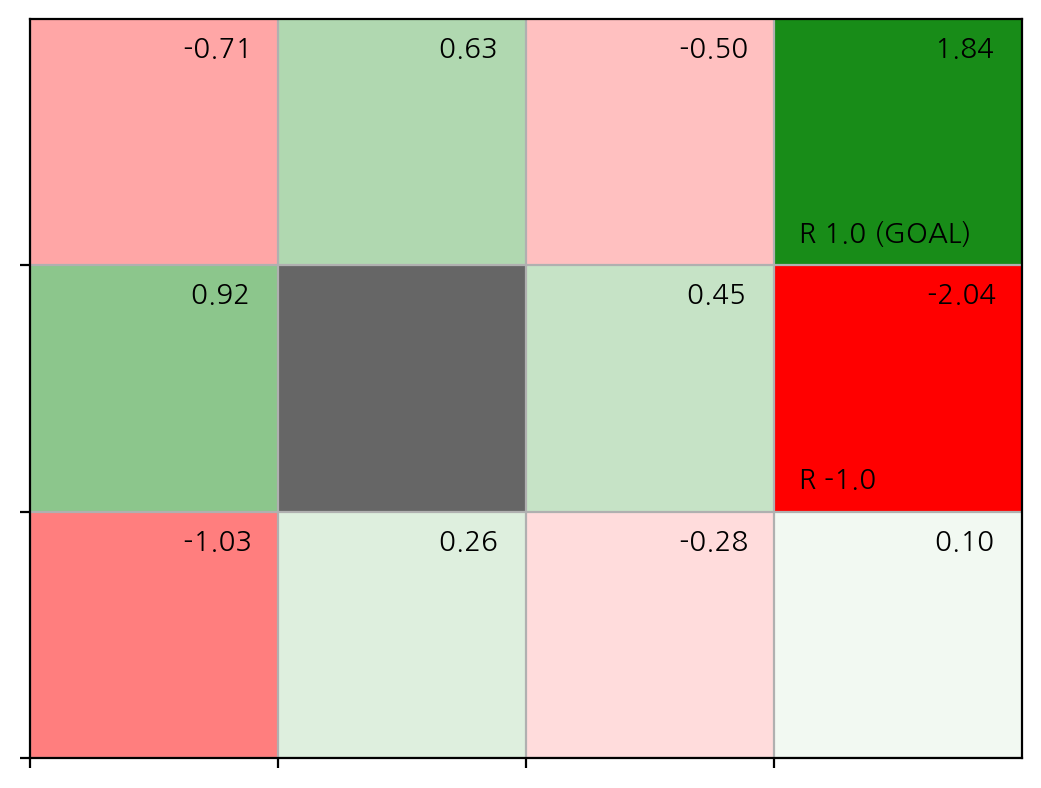

In [37]:
import common.gridworld_render as render_helper

env = GridWorld()
V = {}
for state in env.states():
    V[state] = np.random.randn()
env.render_v(V)

## defaultdict 사용법

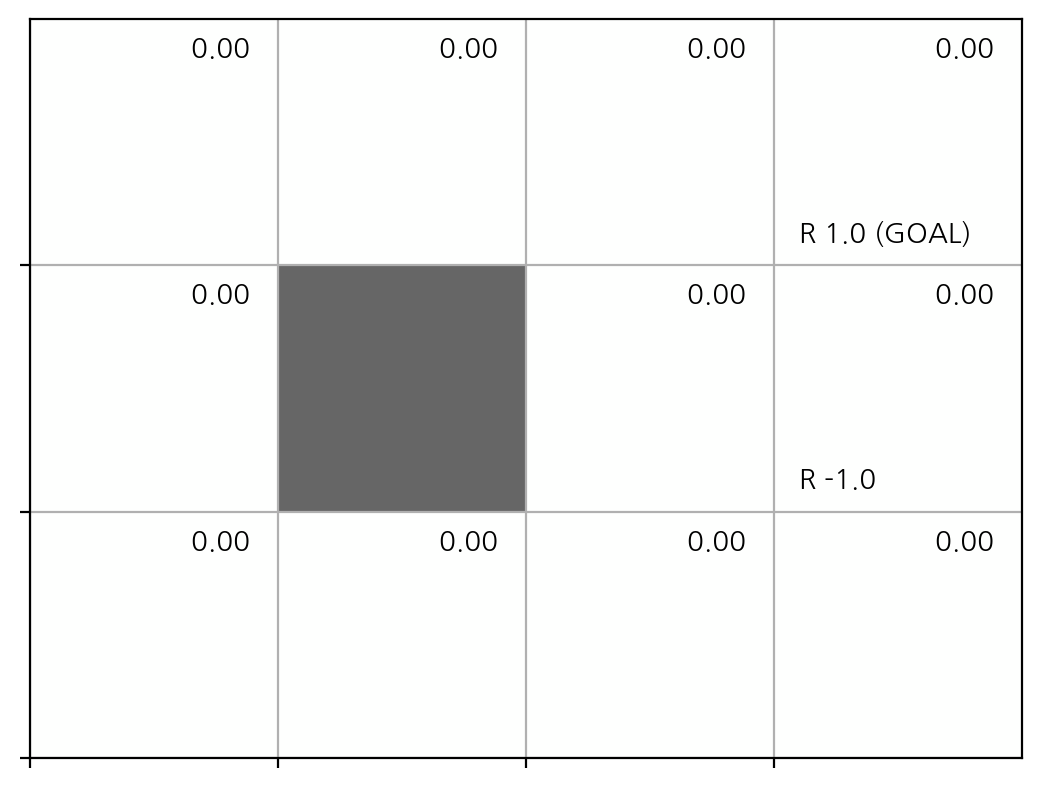

In [43]:
from common.gridworld import GridWorld

env = GridWorld()
V = {}

for state in env.states():
    V[state] = 0

env.render_v(V)

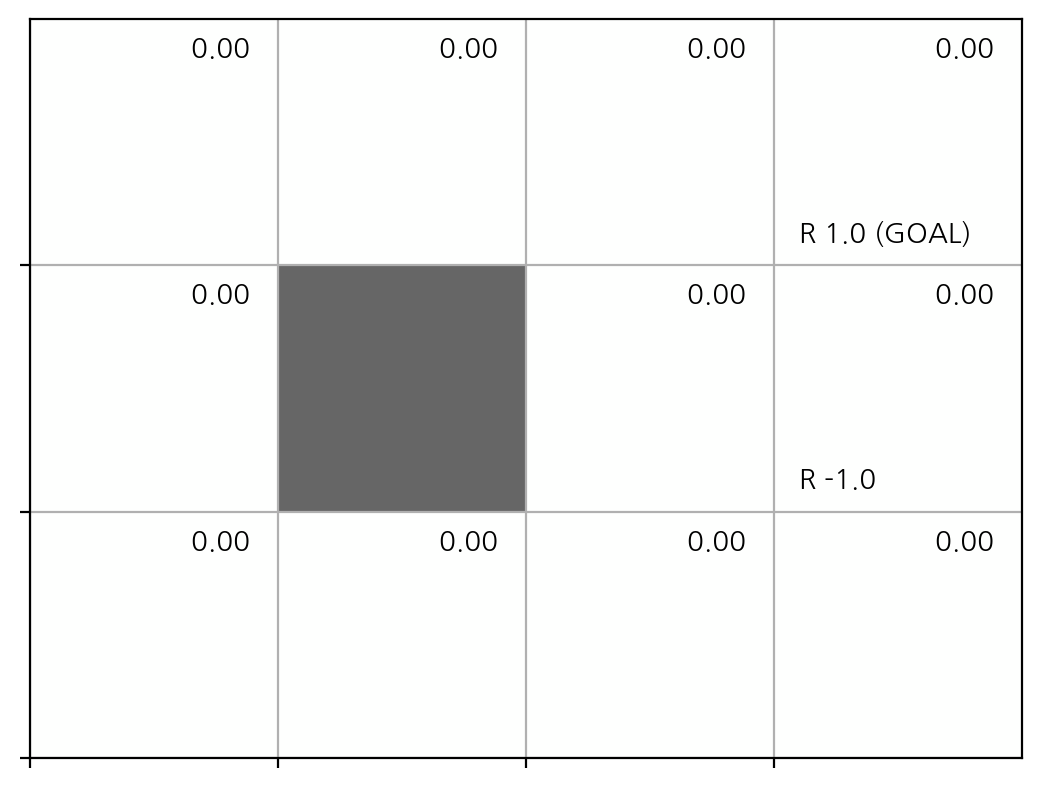

In [44]:
from collections import defaultdict
from common.gridworld import GridWorld

env = GridWorld()
V = defaultdict(lambda: 0)

env.render_v(V)

In [46]:
pi = defaultdict(lambda: {0:0.25, 1:0.25, 2:0.25, 3:0.25})

state = (0, 1)
pi[state]

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}

In [48]:
state = (0, 1)
action_probs = pi[state]
for action, action_prob in action_probs.items():
    print(action)
    print(action_prob)

0
0.25
1
0.25
2
0.25
3
0.25


## 반복적 정책 평가 구현

In [52]:
def eval_onestep(pi, V, env, gamma=0.9):
    for state in env.states():
        if state == env.goal_state:
            V[state] = 0
            continue

        action_probs = pi[state]
        new_V = 0

        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            new_V += action_prob*(r+gamma*V[next_state])
        V[state] = new_V
    return V

In [55]:
def policy_eval(pi, V, env, gamma, threshold=0.001):
    while True:
        old_V = V.copy()
        V = eval_onestep(pi, V, env, gamma)
        delta = 0
        for state in V.keys():
            t = abs(V[state] - old_V[state])
            if delta < t:
                delta = t
        if delta < threshold:
            break
    return V

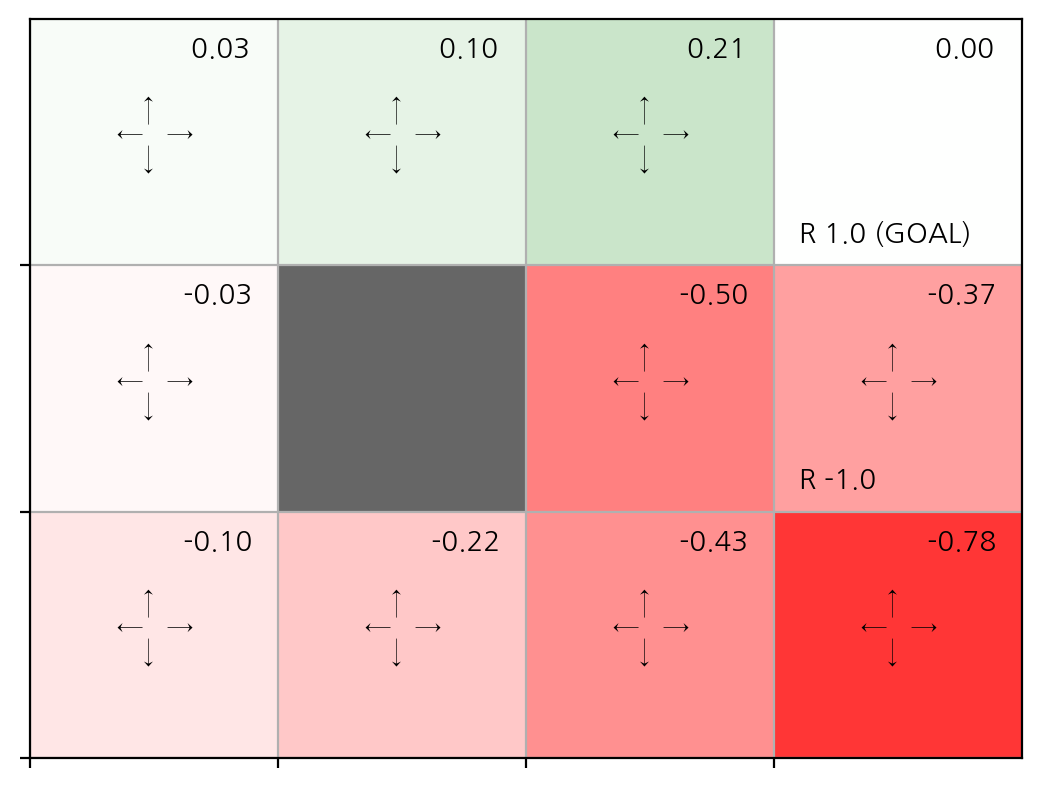

In [56]:
env = GridWorld()
gamma = 0.9
pi = defaultdict(lambda : {0:0.25, 1:0.25, 2:0.25, 3:0.25})
V = defaultdict(lambda : 0)
V = policy_eval(pi, V, env, gamma)
env.render_v(V, pi)

## 가치 방복법 구현

In [2]:
def value_iter_onestep(V, env, gamma):
    for state in env.states():
        if state == env.goal_state:
            V[state] = 0
            continue
        action_values = []
        for action in env.actions():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma*V[next_state]
            action_values.append(value)
        V[state] = max(action_values)
    return V

In [4]:
def value_iter(V, env, gamma, threshold=0.001, is_render=True):
    while True:
        if is_render:
            env.render_v(V)

        old_V = V.copy()
        V = value_iter_onestep(V, env,gamma)

        delta = 0
        for state in V.keys():
            t = abs(V[state] - old_V[state])
            if delta < t:
                delta = t
        if delta < threshold:
            break
    return V

In [12]:
from common.gridworld import GridWorld
from ch04.policy_iter import greedy_policy
from collections import defaultdict

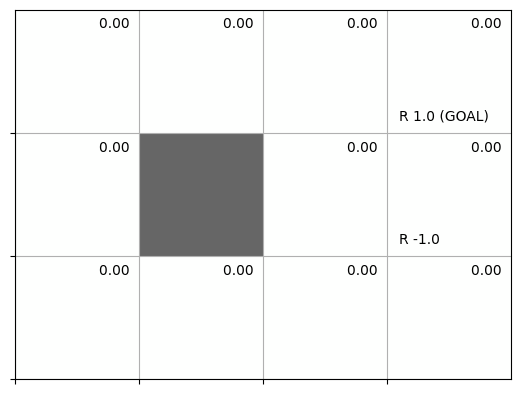

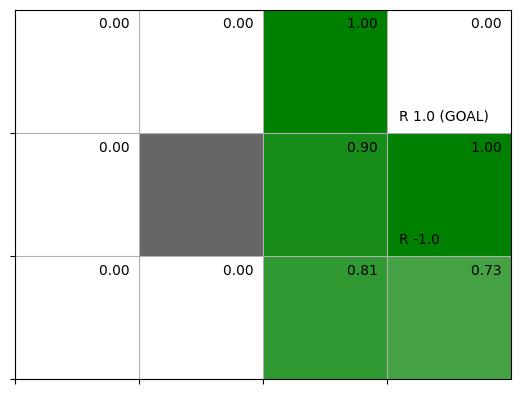

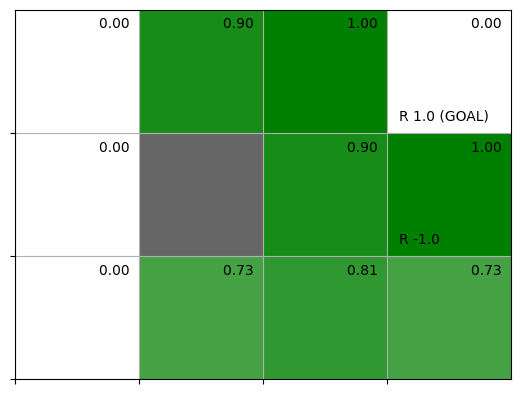

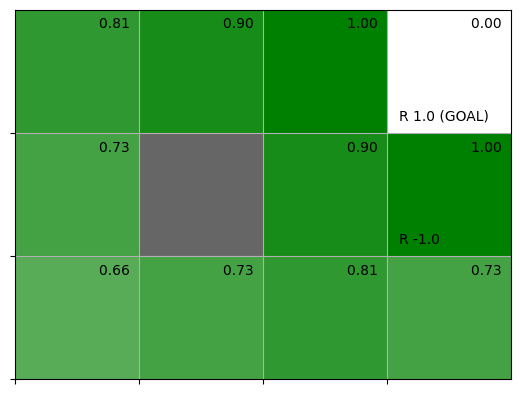

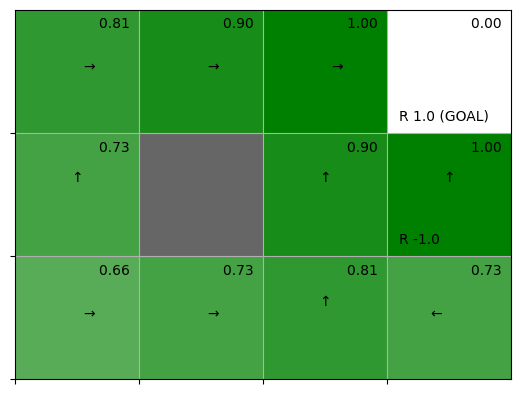

In [15]:
V = defaultdict(lambda : 0)
env = GridWorld()
gamma = 0.9

V = value_iter(V, env, gamma)

pi = greedy_policy(V, env, gamma)
env.render_v(V, pi)